In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import hvplot.pandas

pd.set_option('display.float_format', '{:.6f}'.format)
pd.set_option('display.max_columns', 200)
warnings.filterwarnings("ignore")

### State GDP

In [652]:
gdp_state = pd.read_csv('Data/USGDP_1997_2020.csv')

gdp_state = gdp_state[gdp_state.GeoName != 'United States *']
gdp_state = gdp_state.loc[gdp_state['Description'] == 'All industry total']
gdp_state = gdp_state.drop(['IndustryClassification', 'Description', 'LineCode', 'TableName'], axis=1).reset_index(drop=True)
gdp_state = gdp_state.iloc[:-8, :]
for year in range(1997, 2021):
    gdp_state[str(year)] = pd.to_numeric(gdp_state[str(year)])

# toggle info views
# gdp_state.head()
# gdp_state.info()
# gdp_state.isna().sum()

gdp_state.head()

,GeoFIPS,GeoName,Region,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""01000""",Alabama,5,Millions of current dollars,104716.900000,110181.300000,115833.100000,120132.900000,123035.300000,128117.400000,133969.300000,146886.700000,156403.300000,164347.800000,170263.900000,172677.200000,169128.500000,175470.100000,181929.900000,186553.900000,192166.500000,195037.700000,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000
1,"""02000""",Alaska,8,Millions of current dollars,25800.000000,24227.600000,24779.300000,26815.800000,28455.400000,29633.400000,31789.700000,34987.900000,39788.700000,44457.100000,49002.600000,54759.000000,49651.600000,52947.700000,56333.900000,57717.500000,56625.300000,55750.600000,50728.100000,49755.600000,51737.000000,54292.900000,54385.600000,50246.700000
2,"""04000""",Arizona,6,Millions of current dollars,132290.900000,143286.200000,155282.600000,164609.900000,171480.500000,179475.600000,192764.800000,205390.500000,228232.600000,248154.200000,262245.300000,259262.600000,243764.600000,248125.300000,257881.100000,268068.200000,275007.500000,284851.400000,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000
3,"""05000""",Arkansas,5,Millions of current dollars,59826.900000,62397.800000,66791.200000,68740.400000,70680.300000,73986.500000,78306.300000,84557.000000,89643.100000,94451.600000,96991.900000,99014.400000,96983.700000,100970.800000,105107.800000,107718.800000,112764.600000,116151.800000,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000
4,"""06000""",California,8,Millions of current dollars,1071327.200000,1147944.300000,1247734.400000,1366166.500000,1387551.800000,1439341.700000,1530559.800000,1632428.700000,1752648.900000,1874851.300000,1955320.900000,1990187.900000,1919271.100000,1973511.900000,2049336.800000,2144089.600000,2261510.600000,2399077.700000,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000


### Airline Flights DF

In [839]:
airline_flights = pd.read_csv('Data/US Airline Flight Routes and Fares 1993-2024 2.csv')
airline_flights.sort_values(by=['Year', 'quarter'], ascending=[True, True], inplace=True)
airline_flights.shape

# airline_flights.head()

(245955, 23)

In [700]:
airline_flights.rename(columns={
    'quarter': 'Quarter',
    'city1': 'Origin_City_Name',
    'city2': 'Destination_City_Name',
    'airportid_1': 'Origin_Airport_ID',
    'airportid_2': 'Destination_Airport_ID',
    'airport_1': 'Origin_Airport_Code',
    'airport_2': 'Destination_Airport_Code',
    'nsmiles': 'Distance_Between_Airports',
    'passengers': 'Num_Passengers',
    'fare': 'Average_Fare',
}, inplace=True)

In [701]:
airline_flights = airline_flights[[
                  #  'tbl', 
                  'Year', 'Quarter', 
                  #   'citymarketid_1', 'citymarketid_2',
                  'Origin_City_Name', 'Destination_City_Name', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
                  'Destination_Airport_Code', 'Distance_Between_Airports', 'Num_Passengers', 'Average_Fare',
                  #   'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low',
                  'Geocoded_City1', 'Geocoded_City2', 
                  #   'tbl1apk'
                    ]].copy()

In [703]:
airline_flights = airline_flights[~airline_flights['Year'].between(1993, 2014)]

airline_flights[['Destination_City', 'Destination_State']] = airline_flights['Destination_City_Name'].str.split(", ", expand=True)
airline_flights[['Origin_City', 'Origin_State']] = airline_flights['Origin_City_Name'].str.split(", ", expand=True)
# Toggle to remove Metropolitan area




,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
179531,2015,1,"Houston, TX","Seattle, WA",12266,14747,IAH,SEA,1894,538,292.970000,"Houston, TX\n(29.760803, -95.369506)","Seattle, WA\n(47.603229, -122.33028)",Seattle,WA,Houston,TX
179533,2015,1,"Los Angeles, CA","New York City, NY",13891,15070,ONT,SWF,2510,1,402.360000,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY,Los Angeles,CA
179535,2015,1,"Houston, TX","Los Angeles, CA",12266,13891,IAH,ONT,1390,66,313.060000,"Houston, TX\n(29.760803, -95.369506)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,CA,Houston,TX
179539,2015,1,"Miami, FL","New York City, NY",11697,11618,FLL,EWR,1139,2293,207.710000,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY,Miami,FL
179545,2015,1,"Dallas/Fort Worth, TX","Memphis, TN",11298,13244,DFW,MEM,432,215,329.380000,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Memphis, TN\n(35.143378, -90.052136)",Memphis,TN,Dallas/Fort Worth,TX


In [704]:
airline_flights['Origin_City_Name'] = airline_flights['Origin_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
airline_flights['Destination_City_Name'] = airline_flights['Destination_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)

In [706]:
airline_flights.head()

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
179531,2015,1,"Houston, TX","Seattle, WA",12266,14747,IAH,SEA,1894,538,292.970000,"Houston, TX\n(29.760803, -95.369506)","Seattle, WA\n(47.603229, -122.33028)",Seattle,WA,Houston,TX
179533,2015,1,"Los Angeles, CA","New York City, NY",13891,15070,ONT,SWF,2510,1,402.360000,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY,Los Angeles,CA
179535,2015,1,"Houston, TX","Los Angeles, CA",12266,13891,IAH,ONT,1390,66,313.060000,"Houston, TX\n(29.760803, -95.369506)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,CA,Houston,TX
179539,2015,1,"Miami, FL","New York City, NY",11697,11618,FLL,EWR,1139,2293,207.710000,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY,Miami,FL
179545,2015,1,"Dallas/Fort Worth, TX","Memphis, TN",11298,13244,DFW,MEM,432,215,329.380000,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Memphis, TN\n(35.143378, -90.052136)",Memphis,TN,Dallas/Fort Worth,TX


In [707]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

airline_flights = airline_flights.replace({
    'Destination_State': state_mapping,
    'Origin_State': state_mapping
    })

In [708]:
airline_flights = airline_flights.dropna()

airline_flights.head()

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
179531,2015,1,"Houston, TX","Seattle, WA",12266,14747,IAH,SEA,1894,538,292.970000,"Houston, TX\n(29.760803, -95.369506)","Seattle, WA\n(47.603229, -122.33028)",Seattle,Washington,Houston,Texas
179533,2015,1,"Los Angeles, CA","New York City, NY",13891,15070,ONT,SWF,2510,1,402.360000,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Los Angeles,California
179535,2015,1,"Houston, TX","Los Angeles, CA",12266,13891,IAH,ONT,1390,66,313.060000,"Houston, TX\n(29.760803, -95.369506)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,California,Houston,Texas
179539,2015,1,"Miami, FL","New York City, NY",11697,11618,FLL,EWR,1139,2293,207.710000,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Miami,Florida
179545,2015,1,"Dallas/Fort Worth, TX","Memphis, TN",11298,13244,DFW,MEM,432,215,329.380000,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Memphis, TN\n(35.143378, -90.052136)",Memphis,Tennessee,Dallas/Fort Worth,Texas


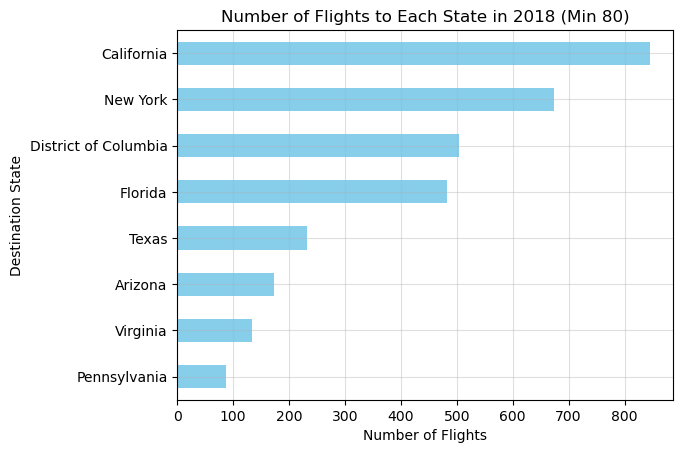

In [709]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

destination_counts = flights_2018['Destination_State'].value_counts()
destination_counts_filtered = destination_counts[destination_counts > 80].sort_values(ascending=True)

destination_counts_filtered.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Flights')
plt.ylabel('Destination State')
plt.title('Number of Flights to Each State in 2018 (Min 80)')
plt.grid(True, alpha= 0.4)

plt.show()

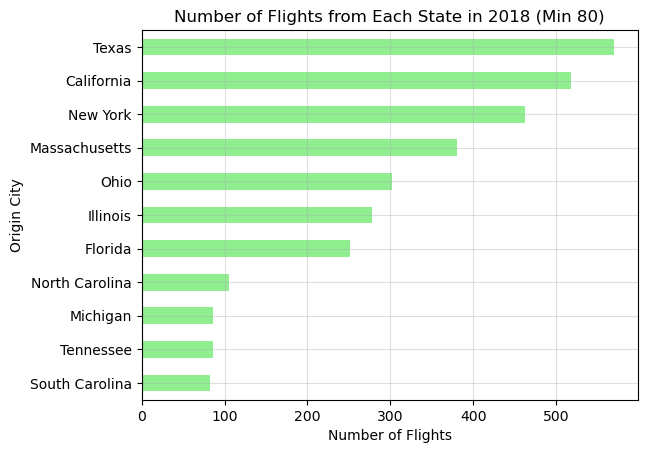

In [710]:
origin_counts = flights_2018['Origin_State'].value_counts()
origin_counts_filtered = origin_counts[origin_counts > 80].sort_values(ascending=True)

origin_counts_filtered.plot(kind='barh', color='lightgreen')

plt.xlabel('Number of Flights')
plt.ylabel('Origin City')
plt.title('Number of Flights from Each State in 2018 (Min 80)')
plt.grid(True, alpha= 0.4)

plt.show()

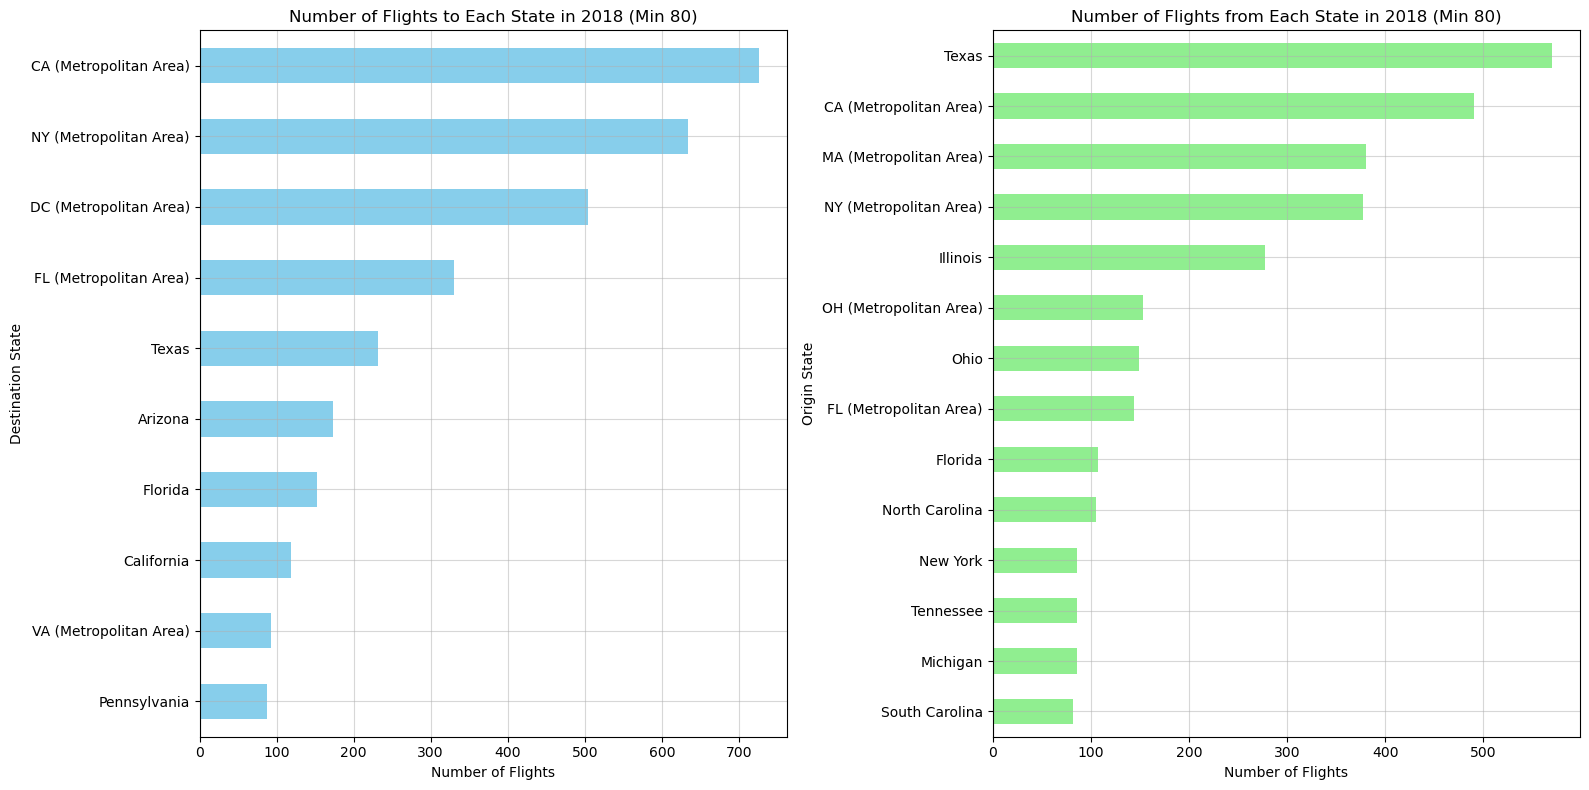

In [661]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
destination_counts_filtered.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Flights')
axes[0].set_ylabel('Destination State')
axes[0].set_title('Number of Flights to Each State in 2018 (Min 80)')
axes[0].grid(True, alpha=0.5)


origin_counts_filtered.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Flights')
axes[1].set_ylabel('Origin State')
axes[1].set_title('Number of Flights from Each State in 2018 (Min 80)')
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### Combining GDP and Flights

In [662]:
flights_2018 = airline_flights.loc[airline_flights.Year == 2018]

In [663]:
state_counts_2018_des = pd.DataFrame(flights_2018['Destination_State'].value_counts()).reset_index()

In [664]:
gdp_state_2018_des = gdp_state[['GeoName','2018']]
gdp_state_2018_des.rename(columns={
    'GeoName': 'Destination_State',
}, inplace=True)

In [665]:
# This is a dataframe that should be graphed
gdp_incoming_flights = pd.merge(state_counts_2018_des, gdp_state_2018_des, on = "Destination_State")
gdp_incoming_flights

,Destination_State,count,2018
0,Texas,232,1795635.100000
1,Arizona,173,350718.300000
2,Florida,152,1050298.400000
3,California,119,2975083.000000
4,Pennsylvania,88,778374.600000
5,Washington,77,575416.700000
6,Missouri,76,317949.100000
7,Tennessee,68,362737.100000
8,North Carolina,62,567451.700000
9,Oregon,58,241978.100000


In [666]:
state_counts_2018_og = pd.DataFrame(flights_2018['Origin_State'].value_counts()).reset_index()
gdp_state_2018_og = gdp_state[['GeoName','2018']]
gdp_state_2018_og.rename(columns={
    'GeoName': 'Origin_State',
}, inplace=True)
gdp_outgoing_flights = pd.merge(state_counts_2018_og, gdp_state_2018_og, on = "Origin_State")
gdp_outgoing_flights.rename(columns= {'count': 'Num_Flights',
                                      '2018': 'GDP_2018'}, inplace=True)
gdp_outgoing_flights.head()

,Origin_State,Num_Flights,GDP_2018
0,Texas,570,1795635.100000
1,Illinois,278,863039.500000
2,Ohio,149,675029.700000
3,Florida,107,1050298.400000
4,North Carolina,105,567451.700000


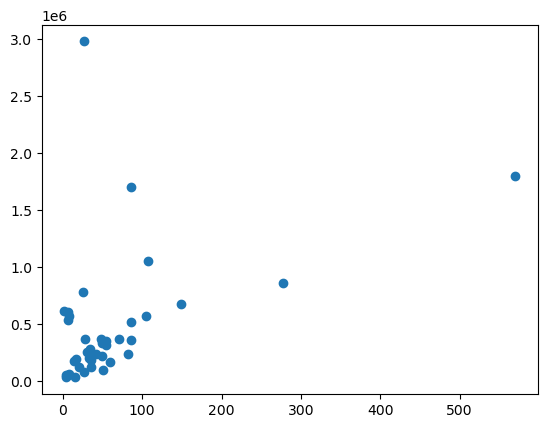

In [667]:


# gdp_outgoing_flights.plot.scatter(x="2018", y="count")
plt.scatter(gdp_outgoing_flights.Num_Flights, gdp_outgoing_flights.GDP_2018)
plt.show()


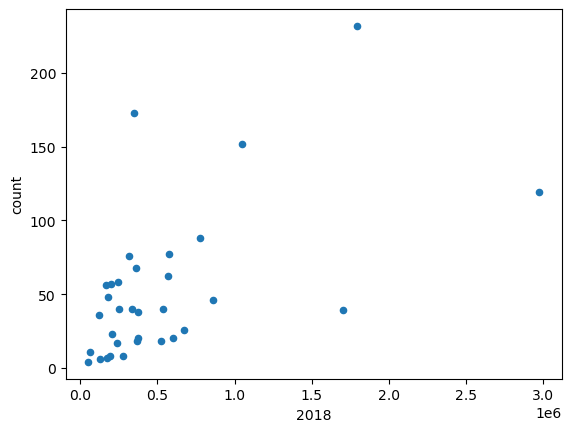

In [668]:
gdp_incoming_flights.plot.scatter(x="2018", y="count")
plt.show()

## Geolocation GDP State Capitols

In [669]:
gdp_state.head()

,GeoFIPS,GeoName,Region,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""01000""",Alabama,5,Millions of current dollars,104716.900000,110181.300000,115833.100000,120132.900000,123035.300000,128117.400000,133969.300000,146886.700000,156403.300000,164347.800000,170263.900000,172677.200000,169128.500000,175470.100000,181929.900000,186553.900000,192166.500000,195037.700000,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000
1,"""02000""",Alaska,8,Millions of current dollars,25800.000000,24227.600000,24779.300000,26815.800000,28455.400000,29633.400000,31789.700000,34987.900000,39788.700000,44457.100000,49002.600000,54759.000000,49651.600000,52947.700000,56333.900000,57717.500000,56625.300000,55750.600000,50728.100000,49755.600000,51737.000000,54292.900000,54385.600000,50246.700000
2,"""04000""",Arizona,6,Millions of current dollars,132290.900000,143286.200000,155282.600000,164609.900000,171480.500000,179475.600000,192764.800000,205390.500000,228232.600000,248154.200000,262245.300000,259262.600000,243764.600000,248125.300000,257881.100000,268068.200000,275007.500000,284851.400000,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000
3,"""05000""",Arkansas,5,Millions of current dollars,59826.900000,62397.800000,66791.200000,68740.400000,70680.300000,73986.500000,78306.300000,84557.000000,89643.100000,94451.600000,96991.900000,99014.400000,96983.700000,100970.800000,105107.800000,107718.800000,112764.600000,116151.800000,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000
4,"""06000""",California,8,Millions of current dollars,1071327.200000,1147944.300000,1247734.400000,1366166.500000,1387551.800000,1439341.700000,1530559.800000,1632428.700000,1752648.900000,1874851.300000,1955320.900000,1990187.900000,1919271.100000,1973511.900000,2049336.800000,2144089.600000,2261510.600000,2399077.700000,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000


In [670]:
gdp_state = gdp_state[['GeoName', 'Unit', '2015', '2016', '2017', '2018',
       '2019', '2020']].copy()
gdp_state.rename(columns= {
    '2015': '2015_GDP',
    '2016': '2016_GDP',
    '2017': '2017_GDP',
    '2018': '2018_GDP',
    '2019': '2019_GDP',
    '2020': '2020_GDP',
})

gdp_state.head()

,GeoName,Unit,2015,2016,2017,2018,2019,2020
0,Alabama,Millions of current dollars,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000
1,Alaska,Millions of current dollars,50728.100000,49755.600000,51737.000000,54292.900000,54385.600000,50246.700000
2,Arizona,Millions of current dollars,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000
3,Arkansas,Millions of current dollars,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000
4,California,Millions of current dollars,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000


In [671]:
gdp_state['2015-2020 Mean'] = gdp_state[['2015', '2016', '2017', '2018', '2019', '2020']].mean(axis=1)
gdp_state = gdp_state.rename(columns= {'GeoName': 'State'})
gdp_state

,State,Unit,2015,2016,2017,2018,2019,2020,2015-2020 Mean
0,Alabama,Millions of current dollars,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000,214931.966667
1,Alaska,Millions of current dollars,50728.100000,49755.600000,51737.000000,54292.900000,54385.600000,50246.700000,51857.650000
2,Arizona,Millions of current dollars,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000,339186.083333
3,Arkansas,Millions of current dollars,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000,124615.650000
4,California,Millions of current dollars,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000,2876922.866667
5,Colorado,Millions of current dollars,317992.400000,327757.300000,348175.500000,372452.900000,392986.000000,390098.700000,358243.800000
6,Connecticut,Millions of current dollars,262372.700000,266747.300000,272569.900000,279782.300000,287822.200000,280900.300000,275032.450000
7,Delaware,Millions of current dollars,71547.800000,69284.200000,69899.400000,74186.700000,77082.400000,75512.500000,72918.833333
8,District of Columbia,Millions of current dollars,124853.700000,129477.100000,132853.600000,138773.500000,143389.300000,143532.700000,135479.983333
9,Florida,Millions of current dollars,897754.700000,941561.200000,990096.600000,1050298.400000,1106500.100000,1095888.200000,1013683.200000


In [672]:
caps = pd.read_csv('Data/us-state-capitals.csv')
caps.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [673]:
gdp_state_with_coords = pd.merge(gdp_state, caps[['name', 'latitude', 'longitude']],
                                 left_on='State', right_on='name', how='left')
gdp_state_with_coords = gdp_state_with_coords.drop(columns=['name'])
gdp_state_with_coords.head()

,State,Unit,2015,2016,2017,2018,2019,2020,2015-2020 Mean,latitude,longitude
0,Alabama,Millions of current dollars,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000,214931.966667,32.377716,-86.300568
1,Alaska,Millions of current dollars,50728.100000,49755.600000,51737.000000,54292.900000,54385.600000,50246.700000,51857.650000,58.301598,-134.420212
2,Arizona,Millions of current dollars,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000,339186.083333,33.448143,-112.096962
3,Arkansas,Millions of current dollars,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000,124615.650000,34.746613,-92.288986
4,California,Millions of current dollars,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000,2876922.866667,38.576668,-121.493629


In [674]:
drop_Hi_AK_DC = [1, 8, 11]
gdp_state_with_coords_noHI_AK = gdp_state_with_coords.drop(index=drop_Hi_AK_DC)


In [675]:
gdp_state_with_coords_noHI_AK.head()

,State,Unit,2015,2016,2017,2018,2019,2020,2015-2020 Mean,latitude,longitude
0,Alabama,Millions of current dollars,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000,214931.966667,32.377716,-86.300568
2,Arizona,Millions of current dollars,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000,339186.083333,33.448143,-112.096962
3,Arkansas,Millions of current dollars,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000,124615.650000,34.746613,-92.288986
4,California,Millions of current dollars,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000,2876922.866667,38.576668,-121.493629
5,Colorado,Millions of current dollars,317992.400000,327757.300000,348175.500000,372452.900000,392986.000000,390098.700000,358243.800000,39.739227,-104.984856


In [676]:
from api_key import geoapify_key

size = gdp_state_with_coords_noHI_AK['2015-2020 Mean'] / 600

gdp_map = gdp_state_with_coords_noHI_AK.hvplot.points(
    'longitude',
    'latitude',
    geo= True,
    tiles = 'EsriImagery',
    tiles_opts= dict(alpha=0.5),
    frame_width = 1000,
    frame_height = 600,
    size = size,
    color = 'State',
    alpha = 0.6,
    title = '2015 - 2020 State Mean GDP (Graphed from State Capital)',
    fontsize={'title': '20pt'},
    features = {'states': '110m'},
    legend = False,
)

gdp_map

# CartoMidnight
# CartoDark
# OSM
# EsriImagery


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (State,_size)
   .States.I :Feature   [Longitude,Latitude]

## Mean GDP Graphs

In [677]:
gdp_state_with_coords_high = gdp_state_with_coords.sort_values(by='2015-2020 Mean', ascending=False)
top_10_states = gdp_state_with_coords_high.head(10)

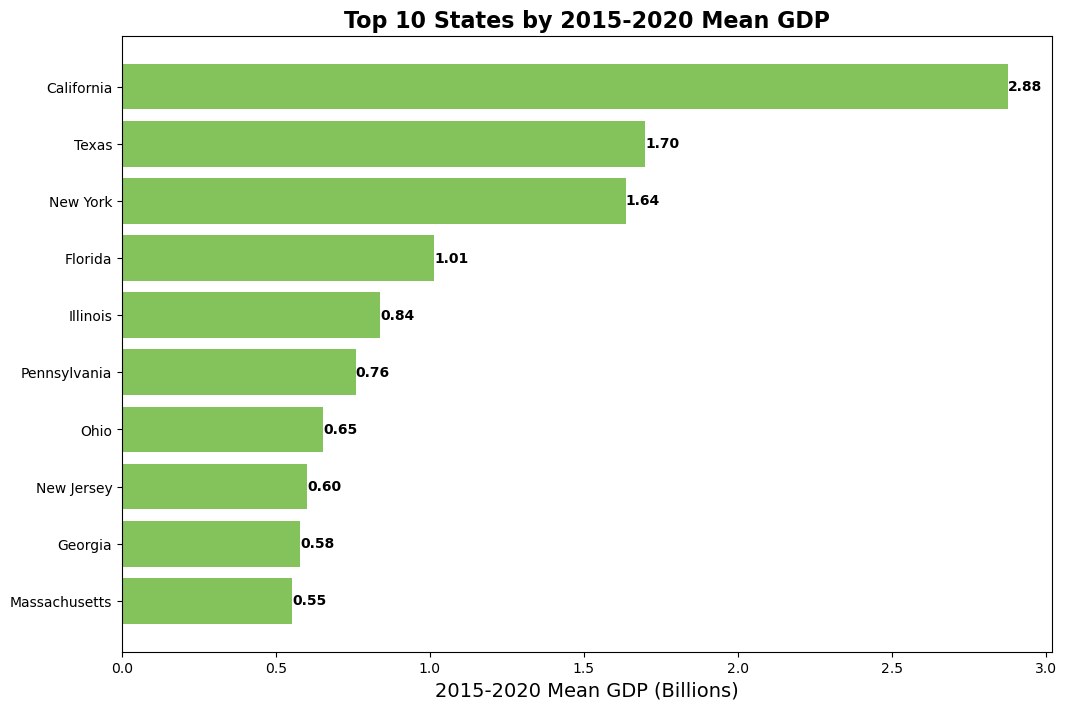

In [678]:
# Create a new column for GDP in billions
top_10_states['2015-2020 Mean (Billions)'] = top_10_states['2015-2020 Mean'] / 1_000_000 


plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_states['State'], top_10_states['2015-2020 Mean (Billions)'], color= (0.4, 0.7, 0.2, 0.8))

# Add exact value labels on the bars
for bar in bars:
    width = bar.get_width()  # Get the GDP value in billions
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', fontsize=10, color='black', fontweight = 'bold')

plt.xlabel('2015-2020 Mean GDP (Billions)', fontsize = 14)
plt.title('Top 10 States by 2015-2020 Mean GDP', fontsize= 16, fontweight = 'heavy')
plt.gca().invert_yaxis()  
plt.show()


In [679]:
gdp_state_with_coords_low = gdp_state_with_coords.sort_values(by='2015-2020 Mean', ascending=True)
bot_10_states = gdp_state_with_coords_low.head(10)

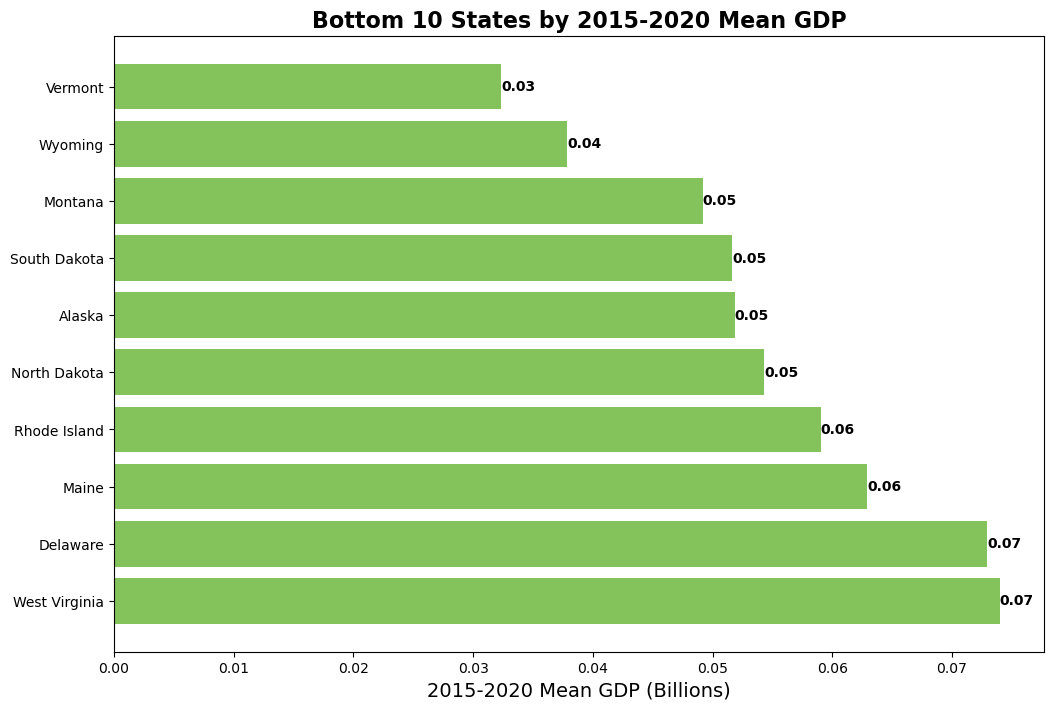

In [680]:
bot_10_states['2015-2020 Mean (Billions)'] = bot_10_states['2015-2020 Mean'] / 1_000_000 


plt.figure(figsize=(12, 8))
bars = plt.barh(bot_10_states['State'], bot_10_states['2015-2020 Mean (Billions)'], color= (0.4, 0.7, 0.2, 0.8))

# Add exact value labels on the bars
for bar in bars:
    width = bar.get_width()  # Get the GDP value in billions
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', fontsize=10, color='black', fontweight = 'bold')

plt.xlabel('2015-2020 Mean GDP (Billions)', fontsize = 14)
plt.title('Bottom 10 States by 2015-2020 Mean GDP', fontsize= 16, fontweight = 'heavy')

plt.gca().invert_yaxis()  
plt.show()


## Mean GDP with Flights

In [711]:
bot_10_states = bot_10_states[['State', 
            #    '2015', '2016', '2017', '2018', '2019', '2020',
       '2015-2020 Mean', 
    # 'latitude', 'longitude'
         '2015-2020 Mean (Billions)']].copy()
bot_10_states

,State,2015-2020 Mean,2015-2020 Mean (Billions)
45,Vermont,32320.983333,0.032321
50,Wyoming,37866.783333,0.037867
26,Montana,49168.683333,0.049169
41,South Dakota,51622.783333,0.051623
1,Alaska,51857.650000,0.051858
34,North Dakota,54328.183333,0.054328
39,Rhode Island,59040.066667,0.059040
19,Maine,62909.266667,0.062909
7,Delaware,72918.833333,0.072919
48,West Virginia,73980.133333,0.073980


In [712]:
top_10_states = top_10_states[['State', 
       #         'Unit', '2015', '2016', '2017', '2018', '2019', '2020',
       '2015-2020 Mean',
       #  'latitude', 'longitude',
         '2015-2020 Mean (Billions)']].copy()
top_10_states

,State,2015-2020 Mean,2015-2020 Mean (Billions)
4,California,2876922.866667,2.876923
43,Texas,1699443.600000,1.699444
32,New York,1636135.716667,1.636136
9,Florida,1013683.200000,1.013683
13,Illinois,839197.533333,0.839198
38,Pennsylvania,758516.783333,0.758517
35,Ohio,653107.383333,0.653107
30,New Jersey,601356.916667,0.601357
10,Georgia,578736.933333,0.578737
21,Massachusetts,552231.950000,0.552232


In [713]:
airline_flights

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
179531,2015,1,"Houston, TX","Seattle, WA",12266,14747,IAH,SEA,1894,538,292.970000,"Houston, TX\n(29.760803, -95.369506)","Seattle, WA\n(47.603229, -122.33028)",Seattle,Washington,Houston,Texas
179533,2015,1,"Los Angeles, CA","New York City, NY",13891,15070,ONT,SWF,2510,1,402.360000,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Los Angeles,California
179535,2015,1,"Houston, TX","Los Angeles, CA",12266,13891,IAH,ONT,1390,66,313.060000,"Houston, TX\n(29.760803, -95.369506)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,California,Houston,Texas
179539,2015,1,"Miami, FL","New York City, NY",11697,11618,FLL,EWR,1139,2293,207.710000,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Miami,Florida
179545,2015,1,"Dallas/Fort Worth, TX","Memphis, TN",11298,13244,DFW,MEM,432,215,329.380000,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Memphis, TN\n(35.143378, -90.052136)",Memphis,Tennessee,Dallas/Fort Worth,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222938,2020,2,"Knoxville, TN","Tampa, FL",15412,15304,TYS,TPA,550,8,210.130000,"(35.962631, -83.916677)","(37.8606, -78.804199)",Tampa,Florida,Knoxville,Tennessee
222939,2020,2,"Fayetteville, AR","Los Angeles, CA",15919,10800,XNA,BUR,1371,0,252.000000,"(36.061928, -94.160583)","(34.052238, -118.243344)",Los Angeles,California,Fayetteville,Arkansas
222940,2020,2,"Fayetteville, AR","Los Angeles, CA",15919,12892,XNA,LAX,1371,18,203.580000,"(36.061928, -94.160583)","(34.052238, -118.243344)",Los Angeles,California,Fayetteville,Arkansas
222941,2020,2,"Fayetteville, AR","Los Angeles, CA",15919,13891,XNA,ONT,1371,7,191.610000,"(36.061928, -94.160583)","(34.052238, -118.243344)",Los Angeles,California,Fayetteville,Arkansas


In [817]:
dest_state_counts = pd.DataFrame(airline_flights['Destination_State'].value_counts()).reset_index()
dest_state_counts.rename(columns = {'count': 'Dest_Count'}, inplace=True)
dest_state_counts.head()

,Destination_State,Dest_Count
0,California,7280
1,New York,5594
2,District of Columbia,4316
3,Florida,3986
4,Texas,1979


In [815]:
orig_state_counts = pd.DataFrame(airline_flights['Origin_State'].value_counts()).reset_index()
orig_state_counts.rename(columns = {'count': 'Orig_Count'}, inplace=True)
orig_state_counts

,Origin_State,Orig_Count
0,Texas,4869
1,California,4431
2,New York,3967
3,Massachusetts,3245
4,Ohio,2512
5,Illinois,2480
6,Florida,2079
7,North Carolina,820
8,South Carolina,764
9,Michigan,720


In [716]:
dest_state_counts.rename(columns={'Destination_State': 'State'}, inplace=True)
orig_state_counts.rename(columns={'Origin_State': 'State'}, inplace=True)

top_10_with_dest = top_10_states.merge(dest_state_counts, on='State', how='left')
top_10_combined = top_10_with_dest.merge(orig_state_counts, on='State', how='left')

In [717]:
top_10_combined

,State,2015-2020 Mean,2015-2020 Mean (Billions),Dest_Count,Orig_Count
0,California,2876922.866667,2.876923,7280,4431
1,Texas,1699443.600000,1.699444,1979,4869
2,New York,1636135.716667,1.636136,5594,3967
3,Florida,1013683.200000,1.013683,3986,2079
4,Illinois,839197.533333,0.839198,383,2480
5,Pennsylvania,758516.783333,0.758517,737,225
6,Ohio,653107.383333,0.653107,494,2512
7,New Jersey,601356.916667,0.601357,10,19
8,Georgia,578736.933333,0.578737,174,646
9,Massachusetts,552231.950000,0.552232,135,3245


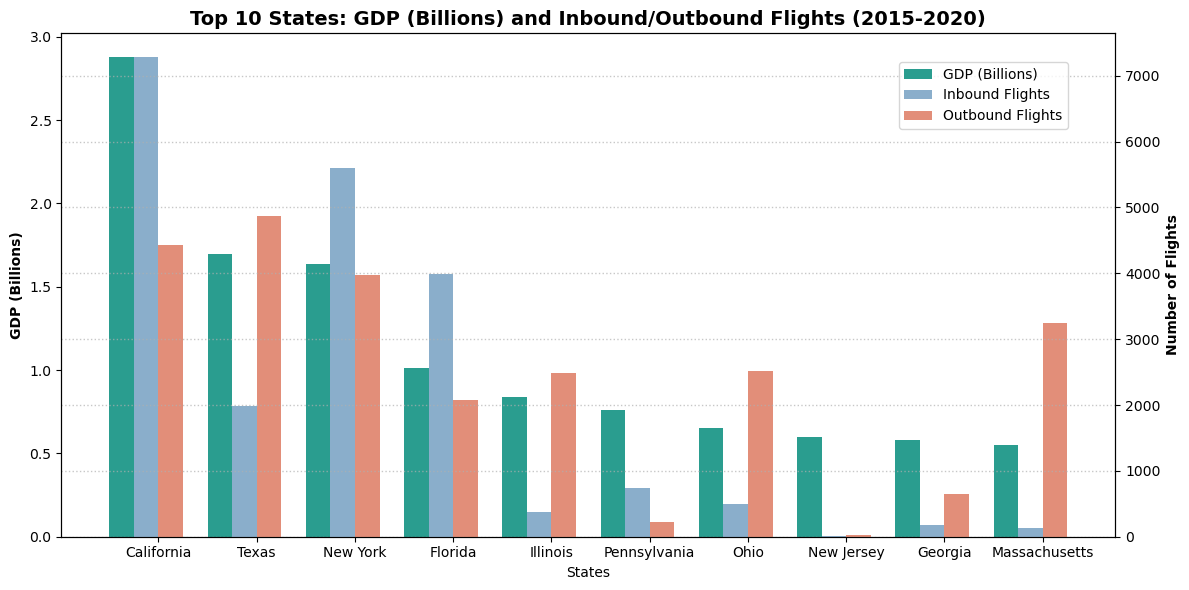

In [727]:
gdp_color = '#2a9d8f' 
inbound_color = '#598cb5'  
outbound_color = '#d65e40'  

# Calculate the positions of the bars
states = top_10_combined['State']
n = len(states)
bar_width = 0.25  
index = np.arange(n)  

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP (Billions) on the first y-axis 
bars_gdp = ax1.bar(index - bar_width, top_10_combined['2015-2020 Mean (Billions)'], bar_width, color=gdp_color, label='GDP (Billions)')
ax1.set_xlabel('States')
ax1.set_ylabel('GDP (Billions)', color='black', fontweight = 'heavy')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis to plot flight data 
ax2 = ax1.twinx()
bars_dest = ax2.bar(index, top_10_combined['Dest_Count'], bar_width, color=inbound_color, alpha=0.7, label='Inbound Flights')
bars_orig = ax2.bar(index + bar_width, top_10_combined['Orig_Count'], bar_width, color=outbound_color, alpha=0.7, label='Outbound Flights')
ax2.set_ylabel('Number of Flights', color='black', fontweight = 'heavy')
ax2.tick_params(axis='y', labelcolor='black')


plt.title('Top 10 States: GDP (Billions) and Inbound/Outbound Flights (2015-2020)', fontweight = 'bold', fontsize = 14)
fig.tight_layout()

# Show legend for both axes
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))

plt.grid(True, linestyle=':', alpha=0.7, linewidth=1)
plt.xticks(index + bar_width / 2, states)  # Adjust x-ticks to be in the middle of the grouped bars
plt.show()


In [719]:
bot_10_with_dest = bot_10_states.merge(dest_state_counts, on='State', how='left')
bot_10_combined = bot_10_with_dest.merge(orig_state_counts, on='State', how='left')


In [720]:
bot_10_combined.fillna(0,inplace=True)
bot_10_combined

,State,2015-2020 Mean,2015-2020 Mean (Billions),Dest_Count,Orig_Count
0,Vermont,32320.983333,0.032321,0.000000,125.000000
1,Wyoming,37866.783333,0.037867,0.000000,48.000000
2,Montana,49168.683333,0.049169,10.000000,83.000000
3,South Dakota,51622.783333,0.051623,34.000000,0.000000
4,Alaska,51857.650000,0.051858,0.000000,0.000000
5,North Dakota,54328.183333,0.054328,0.000000,42.000000
6,Rhode Island,59040.066667,0.059040,0.000000,0.000000
7,Maine,62909.266667,0.062909,96.000000,76.000000
8,Delaware,72918.833333,0.072919,0.000000,0.000000
9,West Virginia,73980.133333,0.073980,0.000000,0.000000


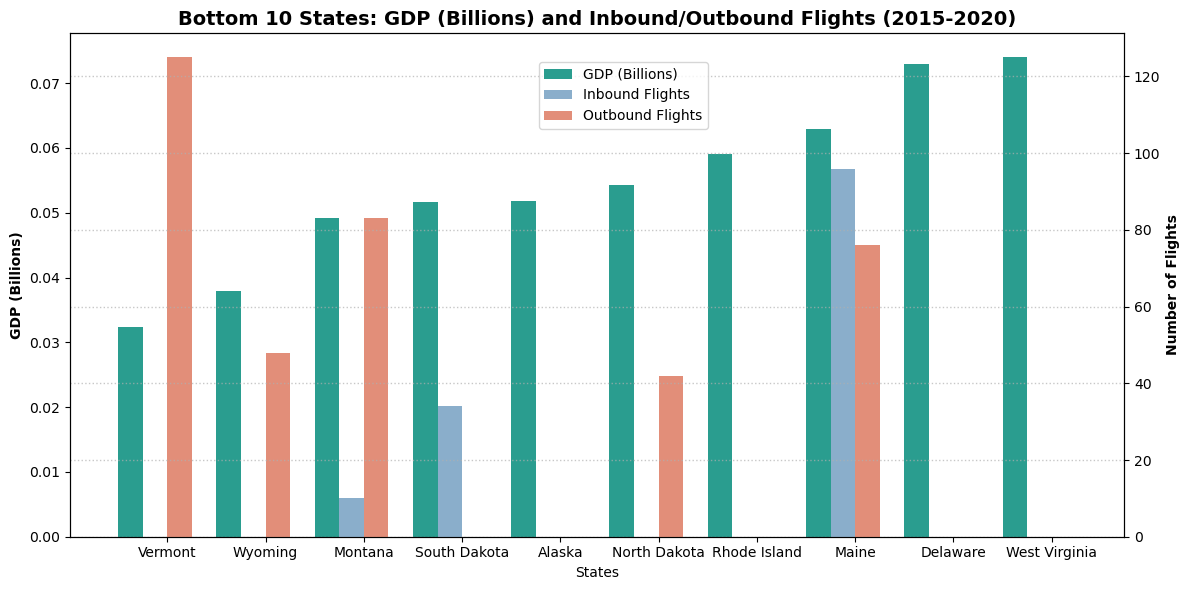

In [728]:
gdp_color = '#2a9d8f' 
inbound_color = '#598cb5'  
outbound_color = '#d65e40'  

# Calculate the positions of the bars
states = bot_10_combined['State']
n = len(states)
bar_width = 0.25  
index = np.arange(n)  

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP (Billions) on the first y-axis 
bars_gdp = ax1.bar(index - bar_width, bot_10_combined['2015-2020 Mean (Billions)'], bar_width, color=gdp_color, label='GDP (Billions)')
ax1.set_xlabel('States')
ax1.set_ylabel('GDP (Billions)', color='black', fontweight = 'heavy')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis to plot flight data 
ax2 = ax1.twinx()
bars_dest = ax2.bar(index, bot_10_combined['Dest_Count'], bar_width, color=inbound_color, alpha=0.7, label='Inbound Flights')
bars_orig = ax2.bar(index + bar_width, bot_10_combined['Orig_Count'], bar_width, color=outbound_color, alpha=0.7, label='Outbound Flights')
ax2.set_ylabel('Number of Flights', color='black', fontweight = 'heavy')
ax2.tick_params(axis='y', labelcolor='black')


plt.title('Bottom 10 States: GDP (Billions) and Inbound/Outbound Flights (2015-2020)', fontweight = 'bold', fontsize = 14)
fig.tight_layout()

# Show legend for both axes
fig.legend(loc="upper right", bbox_to_anchor=(0.6,0.9))
plt.grid(True, linestyle=':', alpha=0.7, linewidth=1)

plt.xticks(index + bar_width / 2, states)  # Adjust x-ticks to be in the middle of the grouped bars
plt.show()


## New Flights Dataset

In [840]:
flights = pd.read_csv('Data/flights.csv')
flights.shape

(36063837, 17)

In [781]:
flights = flights.rename(columns= {'2020': 'YEAR',
                           '1': 'MONTH',
                        '17': 'DAY_OF_MONTH',
                          '5': 'DAY_OF_WEEK',
                        'WN': 'OP_UNIQUE_CARRIER',
                          'Las Vegas': 'ORIGIN_CITY_NAME',
                            'NV': 'ORIGIN_STATE_ABR',
                        'Chicago': 'DEST_CITY_NAME',
                          'IL': 'DEST_STATE_ABR',
                          '08:45:00': 'CRS_DEP_TIME',
                          '24': 'DEP_DELAY_NEW',
                          '14:10:00': 'CRS_ARR_TIME',
                             '8': 'ARR_DELAY_NEW',
                           '0': 'CANCELLED',
                            'NULL': 'CANCELLATION_CODE', 
                             '171': 'AIR_TIME',
                           '1521': 'DISTANCE'})

In [783]:
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,AIR_TIME,DISTANCE
0,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,05:50:00,2.000000,11:10:00,0.000000,0,NaN,172.000000,1521
1,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,13:55:00,NaN,19:30:00,NaN,1,B,NaN,1521
2,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,16:40:00,NaN,22:05:00,NaN,1,B,NaN,1521
3,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,07:40:00,0.000000,13:05:00,0.000000,0,NaN,181.000000,1521
4,2020,1,17,5,WN,Las Vegas,NV,Chicago,IL,19:05:00,NaN,02:05:00,NaN,1,B,NaN,1521


In [784]:
flights = flights[['YEAR','ORIGIN_STATE_ABR',
       'DEST_STATE_ABR']].copy()

In [785]:
flights.head()

,YEAR,ORIGIN_STATE_ABR,DEST_STATE_ABR
0,2020,NV,IL
1,2020,NV,IL
2,2020,NV,IL
3,2020,NV,IL
4,2020,NV,IL


In [786]:
flights = flights.replace({
    'ORIGIN_STATE_ABR': state_mapping,
    'DEST_STATE_ABR': state_mapping
})

In [787]:
flights.head()

,YEAR,ORIGIN_STATE_ABR,DEST_STATE_ABR
0,2020,Nevada,Illinois
1,2020,Nevada,Illinois
2,2020,Nevada,Illinois
3,2020,Nevada,Illinois
4,2020,Nevada,Illinois


In [788]:
flights = flights.rename(columns= {
    'ORIGIN_STATE_ABR': 'Origin_State',
    'DEST_STATE_ABR': 'Destination_State'
})

In [802]:
newdf_dest_state = pd.DataFrame(flights['Destination_State'].value_counts()).reset_index()
newdf_dest_state.rename(columns = {'count': 'Dest_Count'}, inplace=True)
newdf_dest_state.head()

,Destination_State,Dest_Count
0,California,4233159
1,Texas,3876544
2,Florida,2869620
3,Georgia,2255050
4,Illinois,2250446


In [803]:
newdf_orig_state = pd.DataFrame(flights['Origin_State'].value_counts()).reset_index()
newdf_orig_state.rename(columns = {'count': 'Orig_Count'}, inplace=True)
newdf_orig_state.head()

,Origin_State,Orig_Count
0,California,4232987
1,Texas,3876511
2,Florida,2869624
3,Georgia,2255169
4,Illinois,2250856


In [804]:
gdp_state = gdp_state[['State','2015-2020 Mean']].copy()
gdp_state['2015-2020 Mean (Billions)'] = gdp_state['2015-2020 Mean'] / 1_000_000
gdp_state.head()

,State,2015-2020 Mean,2015-2020 Mean (Billions)
0,Alabama,214931.966667,0.214932
1,Alaska,51857.650000,0.051858
2,Arizona,339186.083333,0.339186
3,Arkansas,124615.650000,0.124616
4,California,2876922.866667,2.876923


In [805]:
newdf_dest_state.rename(columns={'Destination_State': 'State'}, inplace=True)
newdf_orig_state.rename(columns={'Origin_State': 'State'}, inplace=True)

gdp_state_with_dest = gdp_state.merge(newdf_dest_state, on='State', how='left')
gdp_state_combined = gdp_state_with_dest.merge(newdf_orig_state, on='State', how='left')

In [818]:
# gdp_state_combined = gdp_state_combined.drop(columns=['2015-2020 Mean'])


In [828]:
gdp_state_combined = gdp_state_combined.sort_values(by='2015-2020 Mean (Billions)', ascending= False)
pd.set_option('display.float_format', '{:.3f}'.format)

In [829]:
new_top_10 = gdp_state_combined.head(10)
new_top_10

,State,2015-2020 Mean (Billions),Dest_Count,Orig_Count
4,California,2.877,4233159.000,4232987.000
43,Texas,1.699,3876544.000,3876511.000
32,New York,1.636,1706620.000,1706728.000
9,Florida,1.014,2869620.000,2869624.000
13,Illinois,0.839,2250446.000,2250856.000
38,Pennsylvania,0.759,805197.000,805201.000
35,Ohio,0.653,523395.000,523397.000
30,New Jersey,0.601,720823.000,720415.000
10,Georgia,0.579,2255050.000,2255169.000
21,Massachusetts,0.552,744910.000,744894.000


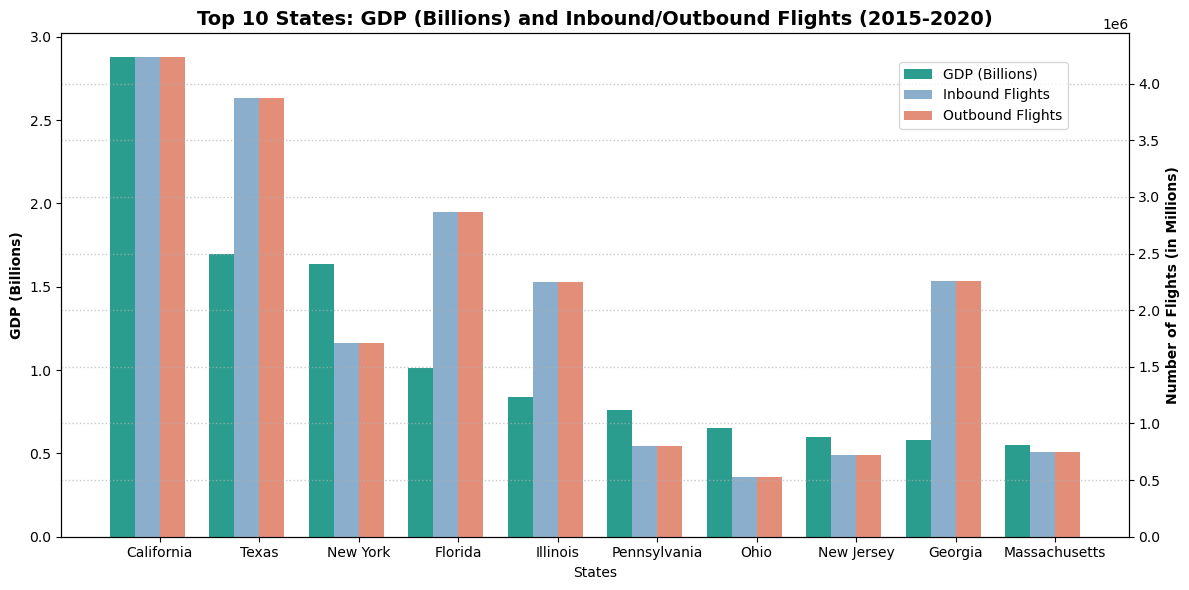

In [832]:
gdp_color = '#2a9d8f' 
inbound_color = '#598cb5'  
outbound_color = '#d65e40'  

# Calculate the positions of the bars
states = new_top_10['State']
n = len(states)
bar_width = 0.25  
index = np.arange(n)  

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP (Billions) on the first y-axis 
bars_gdp = ax1.bar(index - bar_width, new_top_10['2015-2020 Mean (Billions)'], bar_width, color=gdp_color, label='GDP (Billions)')
ax1.set_xlabel('States')
ax1.set_ylabel('GDP (Billions)', color='black', fontweight = 'heavy')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis to plot flight data 
ax2 = ax1.twinx()
bars_dest = ax2.bar(index, new_top_10['Dest_Count'], bar_width, color=inbound_color, alpha=0.7, label='Inbound Flights')
bars_orig = ax2.bar(index + bar_width, new_top_10['Orig_Count'], bar_width, color=outbound_color, alpha=0.7, label='Outbound Flights')
ax2.set_ylabel('Number of Flights (in Millions)', color='black', fontweight = 'heavy')
ax2.tick_params(axis='y', labelcolor='black')


plt.title('Top 10 States: GDP (Billions) and Inbound/Outbound Flights (2015-2020)', fontweight = 'bold', fontsize = 14)
fig.tight_layout()

# Show legend for both axes
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))

plt.grid(True, linestyle=':', alpha=0.7, linewidth=1)
plt.xticks(index + bar_width / 2, states)  # Adjust x-ticks to be in the middle of the grouped bars
plt.show()

In [833]:
new_bot_10 = gdp_state_combined.tail(10)
new_bot_10

,State,2015-2020 Mean (Billions),Dest_Count,Orig_Count
48,West Virginia,0.074,25046.000,25047.000
7,Delaware,0.073,98.000,100.000
19,Maine,0.063,58533.000,58532.000
39,Rhode Island,0.059,84399.000,84397.000
34,North Dakota,0.054,88987.000,88978.000
1,Alaska,0.052,212180.000,212192.000
41,South Dakota,0.052,62235.000,62218.000
26,Montana,0.049,110210.000,110210.000
50,Wyoming,0.038,49717.000,49718.000
45,Vermont,0.032,33991.000,33993.000


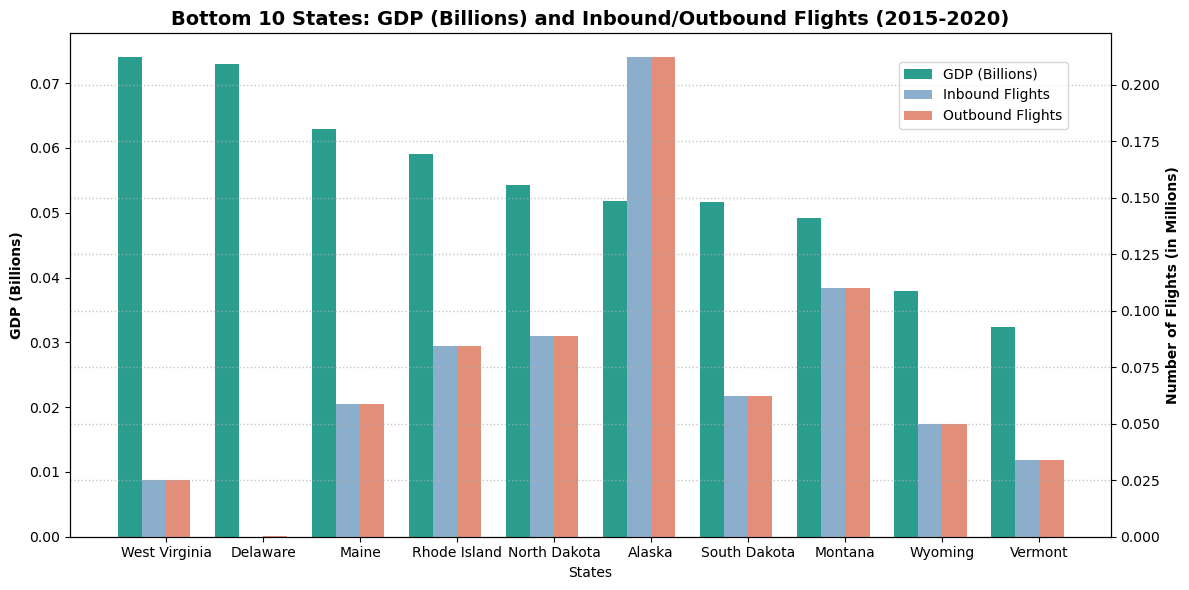

In [838]:
# Calculate the positions of the bars
states = new_bot_10['State']
n = len(states)
bar_width = 0.25  
index = np.arange(n)  

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP (Billions) on the first y-axis 
bars_gdp = ax1.bar(index - bar_width, new_bot_10['2015-2020 Mean (Billions)'], bar_width, color=gdp_color, label='GDP (Billions)')
ax1.set_xlabel('States')
ax1.set_ylabel('GDP (Billions)', color='black', fontweight = 'heavy')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis to plot flight data 
ax2 = ax1.twinx()
bars_dest = ax2.bar(index, new_bot_10['Dest_Count'] / 1_000_000, bar_width, color=inbound_color, alpha=0.7, label='Inbound Flights')
bars_orig = ax2.bar(index + bar_width, new_bot_10['Orig_Count'] / 1_000_000, bar_width, color=outbound_color, alpha=0.7, label='Outbound Flights')
ax2.set_ylabel('Number of Flights (in Millions)', color='black', fontweight = 'heavy')
ax2.tick_params(axis='y', labelcolor='black')


plt.title('Bottom 10 States: GDP (Billions) and Inbound/Outbound Flights (2015-2020)', fontweight = 'bold', fontsize = 14)
fig.tight_layout()

# Show legend for both axes
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))

plt.grid(True, linestyle=':', alpha=0.7, linewidth=1)
plt.xticks(index + bar_width / 2, states)  # Adjust x-ticks to be in the middle of the grouped bars
plt.show()